# Proyek Analisis Data: Nama dataset
- Nama: Ibnu Topan Adib Amrulloh
- Email: resyaderesya@gmail.com
- Id Dicoding: ibnu_topan_adib_amrulloh_UlbY

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah antara casual user dan registered user dalam kurun waktu tertentu (bulan atau hari)?
- Apakah ada perbedaan jumlah total user yang signifikan antara hari libur dan bukan hari libur?
- Apakah user lebih banyak meminjam sepeda di musim-musim tertentu?
- Apakah user lebih banyak meminjam sepeda di jam tertentu?
- Bagaimana pengaruh parameter cuaca terhadap peminjaman sepeda?

## Menyaipkan semua library yang dibuthkan

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## Data Wrangling

### Gathering Data

Data yang dibutuhkan sudah disediakan oleh dicoding sehingga tahap gathering data bisa dilewati. adapun dataset yang digunakan adalah dataset `Bike sharing dataset`. Dataset ini berisi jumlah sepeda sewaan per jam dan per hari antara tahun 2011 dan 2012 di sistem berbagi sepeda Capital dengan informasi cuaca dan musim yang sesuai.

#### Load Dataset `hour.csv`


In [4]:
hour = pd.read_csv('data/hour.csv')

In [5]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Load Dataset `day.csv`

In [6]:
day = pd.read_csv('data/day.csv')

In [7]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Menilai Data `hour.csv`

Untuk mengetahui mengenai informasi tentang dataset seperti jumlah kolom, nama kolom, jumlah baris dan tipe data dari setiap kolom digunakan method `info()` dari library pandas

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat diketahui jika semua kolom tidak mengandung missing value, namun terdapat kesalahan tipe data untuk kolom `dtday`. kolom tersebut merupakan kolom yang berisi tanggal peminjaman, kolom tersebut seharusnya bertipe data <b>datetime</b> bukan <b>object</b>.

Untuk meyakinkan jika data tidak memiliki missing value, dilakukan pengecekan jumlah missing value pada semua kolom yang ada pada dataset.

In [9]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Semua feature pada data `hour.csv` tidak memiliki missing value sehingga tidak perlu dilakukan pembersihan terhadap record ataupun feature yang memiliki missing value

Selanjutnya dilakukan pengecekan terhadap duplikasi pada data `hour.csv`

In [10]:
print(f" jumlah duplikasi pada data 'hour.csv' : {hour.duplicated().sum()}")

 jumlah duplikasi pada data 'hour.csv' : 0


Dapat diketahui jika tidak duplikasi record pada dataset `hour.csv`. selanjutnya dilakukan pemeriksaan terhadap paramter statistik seperti nilai rata-rata, median, persentil 25, persentil 75 dll. untuk mengetahui tingkat pemustan dan persebaran data pada dataset `hour.csv`

In [11]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat diketahui jika tidak ada yang aneh dari dataset tersebut

#### Menilai dataset `day.csv`

Untuk menilai kualitas dari data `day.csv` langkah-langkah yang dilakukan sama seperti langkah-langkah yang dilakukan untuk menilai kualitas dari data `hor.csv`

Untuk mengetahui mengenai informasi tentang dataset seperti jumlah kolom, nama kolom, jumlah baris dan tipe data dari setiap kolom digunakan method info() dari library pandas

In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat diketahui jika semua kolom tidak mengandung missing value, sama seperti dataset `hour.csv` terdapat kesalahan tipe data untuk kolom dtday. kolom tersebut merupakan kolom yang berisi tanggal peminjaman, kolom tersebut seharusnya bertipe data datetime bukan object.

In [13]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Selanjutnya dilakukan pengecekan apakah terdapat nilai duplikat dalam datset

In [14]:
print(f" nilai duplikat pada dataset 'day.csv' : {day.duplicated().sum()}")

 nilai duplikat pada dataset 'day.csv' : 0


Selanjutnya dilakukan pemeriksaan terhadap parameter statistik seperti nilai rata-rata, median, persentil 25, persentil 75 dll. untuk mengetahui tingkat pemustan dan persebaran data pada dataset hour.csv

In [15]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Setelah dilakukan tahap assesing (penilaian kuliatas) terhadap dataset `day.csv` dan `hour.csv` dapat disimpulkan pernyataan sebagai berikut:
1. kedua data tidak mengandung duplikasi ataupun <i>missing value</i>.
2. tidak ada keanehan dari <i>value</i> pada kolom yang ada pada dataset.
3. kedua data memiliki masalah yang sama yaitu fitur `dteday` seharusnya bertipe data datetime bukan object.

#### Cleaning Data `hour.csv`

untuk merubah tipe data dari fitur dteday dari object menjadi tipe data datetime digunakan method apply yang akan menerapkan sebuah fungsi kepada semua nilai yang terdapat pada fitur dteday. fungsi tersebut merupakan lambda function yang akan merubah setiap data menjadi tipe dateday dengan method to_datetime()

In [16]:
hour['dteday'] = hour['dteday'].apply(lambda x: pd.to_datetime(x))

In [17]:
hour['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


In [18]:
day['dteday'].head(3)

0    2011-01-01
1    2011-01-02
2    2011-01-03
Name: dteday, dtype: object

#### Cleaning data `day.csv`

Kita lakukan hal yang sama untuk merubah semua tipe data fitur dteday pada dataset day menjadi tipe data datetime yaitu dengan menggunakan method apply() yang akan menerapkan sebuah fungsi kepada semua nilai yang terdapat pada fitur dteday. fungsi tersebut merupakan lambda function yang akan merubah setiap data menjadi tipe dateday dengan method to_datetime()

In [19]:
day['dteday'] = day['dteday'].apply(lambda x: pd.to_datetime(x))

In [20]:
day['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [21]:
day['dteday'].head(3)

0   2011-01-01
1   2011-01-02
2   2011-01-03
Name: dteday, dtype: datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore dataset `day.csv`

Sebelum melakukan Exploratory Data Analysis (EDA) terlebih dahulu kita lihat gambaran umum dataset dengan method head() dan memberikan argumen 10 untuk menampilkan 10 record pertama dalam dataset

In [22]:
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Dataset tersebut memiliki informasi mengenai data peminjam sepeda baik casual users atau register users dan faktor-faktor yang mempengaruhi peminjaman sepeda seperti <i>season, holiday, weekday, workingday, weathersit, temperature, atemp, humidity, dan windspeed</i>

Pertama kita akan menganalisis perbandingan jumlah antara *casual user* dan *registered user* untuk setiap bulan.

In [23]:
day.groupby("mnth").agg({
    'casual' : 'sum',
    'registered' : 'sum'
}).sort_values(by=['casual', 'registered'], ascending = False)

,casual,registered
mnth,,
7,78157,266791
5,75285,256401
6,73906,272436
8,72039,279155
9,70323,275668
4,60802,208292
10,59760,262592
3,44444,184476
11,36603,218228


Dari informasi tersebut, dapat disimpulkan bahwa setiap bulannya jumlah peminjam sepeda dari registered user selalu lebih tinggi daripada jumlah peminjam sepeda dari casual user. Selain itu, kedua kelompok user cenderung meminjam sepeda pada bulan 5, 6, 7, 8, dan 9. Hal ini menunjukkan adanya sesuatu yang mungkin mempengaruhi, seperti kondisi cuaca pada bulan-bulan tersebut.

Selanjutnya kita ingin mengetahui berapa perbandingan antara jumlah <i>casual users</i> dan jumlah <i>registered users</i> dalam 731 hari. ini bisa kita lakukan dengan melihat rasio perbandingan antara <i>casual users</i> dan <i>registered users</i> dengan jumlah total user yang ada.

In [24]:
casual_user = day['casual'].sum()/day['cnt'].sum()
print(f" ratio perbandingan antara casual user dan semua user {casual_user:0.2f}")
registered_user = day['registered'].sum()/day['cnt'].sum()
print(f" ratio perbandingan antara registered user dan semua user {registered_user:0.2f}")

 ratio perbandingan antara casual user dan semua user 0.19
 ratio perbandingan antara registered user dan semua user 0.81


Informasi tersebut menunjukkan bahwa 81% dari jumlah peminjam berasal dari registered user (pengguna yang mendaftar), sedangkan hanya 19% berasal dari casual user (pengguna yang tidak mendaftar).

Selanjutnya dilakukan analisis terhadap pengaruh hari libur terhadap jumlah peminjam sepeda dengan cara mengetahui rata-rata dan median peminjam sepeda pada hari libur dan peminjam sepeda pada hari bukan libur.

In [25]:
day.groupby(by = 'holiday').agg({
    'instant' : 'nunique',
    'registered' : [ 'mean', 'median'],
    'casual' : [ 'mean', 'median'],
    'cnt' : [ 'mean', 'median']
})

instant   registered               casual                 cnt        
        nunique         mean  median         mean median         mean  median
holiday                                                                      
0           710  3685.332394  3691.0   841.771831  711.5  4527.104225  4558.0
1            21  2670.285714  2549.0  1064.714286  874.0  3735.000000  3351.0

Dari informasi tersebut, berikut adalah beberapa hal yang dapat disimpulkan:

- Dalam 731 hari, terdapat 21 hari libur dan 710 hari bukan libur.
- Pengguna yang terdaftar (registered user) lebih banyak meminjam sepeda pada hari-hari bukan libur. Hal ini dapat dilihat dari nilai rata-rata dan median jumlah peminjam sepeda oleh registered user pada hari-hari bukan libur yang lebih tinggi dibandingkan dengan hari libur.
- Pengguna casual (casual user) lebih banyak meminjam sepeda pada hari libur. Hal ini dapat dilihat dari nilai rata-rata dan median jumlah peminjam sepeda oleh casual user pada hari libur yang lebih tinggi dibandingkan dengan hari-hari bukan libur.
- Secara keseluruhan, total jumlah peminjam sepeda pada hari bukan libur lebih banyak karena jumlah registered user mendominasi total jumlah pengguna.

Kesimpulannya, pada hari bukan libur, pengguna terdaftar cenderung lebih aktif meminjam sepeda, sementara pengguna casual lebih aktif pada hari libur. Dan secara keseluruhan, hari-hari bukan libur memiliki jumlah peminjam sepeda yang lebih tinggi karena dominasi jumlah registered user.

In [26]:
day.groupby(by = 'workingday').agg({
    'instant' : 'nunique',
    'registered' : [ 'mean', 'median'],
    'casual' : [ 'mean', 'median'],
    'cnt' : [ 'mean', 'median']
})

instant   registered               casual                  cnt  \
           nunique         mean  median         mean  median         mean   
workingday                                                                  
0              231  2959.034632  2928.0  1371.134199  1338.0  4330.168831   
1              500  3978.250000  3866.0   606.570000   616.5  4584.820000   

                    
            median  
workingday          
0           4459.0  
1           4582.0

Dari informasi tersebut, berikut adalah beberapa hal yang dapat disimpulkan:
- Dalam 731 hari tterdapat 500 hari kerja dan 231 hari bukan kerja. jumlah hari bukan kerja tidak sama dengan hari libur dikarenakan jumlah hari bukan kerja diambil dari seluruh total akhir pekan ditambah dengan hari libur.
- Pengguna yang terdaftar (registered user) lebih banyak meminjam sepeda pada hari-hari kerja. Hal ini dapat dilihat dari nilai rata-rata dan median jumlah peminjam sepeda oleh registered user pada hari-hari kerja yang lebih tinggi dibandingkan dengan hari-hari bukan kerja.
- Pengguna casual (casual user) lebih banyak meminjam sepeda pada bukan hari kerja. Hal ini dapat dilihat dari nilai rata-rata dan median jumlah peminjam sepeda oleh casual user pada bkan hari kerja yang lebih tinggi dibandingkan dengan hari-hari kerja.

Menariknya kesimpulan yang didapatkan mirip dengan kesimpulan sebelumnya yaitu pada hari kerja, pengguna terdaftar cenderung lebih aktif meminjam sepeda, sementara pengguna casual lebih aktif pada hari bukan kerja.

Selanjutnya dilakukan analisis prngaruh musim terhadap jumlah user, sebelum itu dikarenakan musim sudah dirubah menjadi numerik kita kembalikan nilainya menjadi seperti sebelumnya untuk mempermudah analisis

In [27]:
day['season'].unique()

array([1, 2, 3, 4])

In [28]:
season = {1: 'springer', 2 : 'summer', 3 : 'fall', 4 : 'winter'}

day['season'] = day['season'].replace(season)

In [29]:
day['season'].unique()

array(['springer', 'summer', 'fall', 'winter'], dtype=object)

In [30]:
day.groupby(by = "season").agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt" : 'sum',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
springer,60622,410726,471348


Dari informasi tersebut bisa disimpulkan, baik registered user maupun casual user cenderung lebih aktif meminjam sepeda pada musim fall atau musim gugur.

Selanjutnya dilakukan analisis mengenai pengaruh *feature* seperti  *weathersit, temperature, atemp, humidity, dan windspeed* terhadap jumlah peminjam sepeda. namun dikarenakan *feature-feature* tersebut sudah dinormalisasi, kita kembalikan ke nilai awal supaya lebih mudah untuk dianalisis.

**A. Feature temp**<br>
feature temp berisi data temperature per hari yang sudah dinormalisasi dengan cara membagi setiap nilai dengan nilai maksimumnya yaitu 41 oleh karena itu kita perlu mengembalikan nilainya sperti semula dengan cara mengalikan setiap nilainya dengan 41 agar mudah untuk dianalisis.

In [31]:
day['temp'].head(5)

0    0.344167
1    0.363478
2    0.196364
3    0.200000
4    0.226957
Name: temp, dtype: float64

In [32]:
day['temp'] = day['temp'].apply(lambda x: x*41)

In [33]:
day['temp'].head(5)

0    14.110847
1    14.902598
2     8.050924
3     8.200000
4     9.305237
Name: temp, dtype: float64

Untuk mempermudah analisis kita lebih baik mengelompokkan temperature atau suhu kedelam beberpa kategori yaitu *cold, cool, warm, hot dan very hot*. pengelompokkan suhu ini bersumber dari website https://thinkmetric.uk/basics/temperature/

In [34]:
def kategori_suhu(suhu):
  if suhu >=-10 and suhu<15:
    suhu = 'cold'
  elif suhu>= 15 and suhu<25:
    suhu = 'cool'
  elif suhu>= 25 and suhu <30:
    suhu = 'warm'
  elif suhu>= 30 and suhu<38:
    suhu = 'hot'
  elif suhu> 38:
    suhu = 'very hot'
  return suhu

day['temp_category'] = day['temp'].apply(kategori_suhu)

In [35]:
day[['temp', 'temp_category']].sort_values(by="temp", ascending = False)

,temp,temp_category
553,35.328347,hot
203,34.815847,hot
202,34.781653,hot
209,34.371653,hot
545,34.200847,hot
...,...,...
407,5.227500,cold
368,4.407500,cold
23,3.993043,cold
22,3.957390,cold


Selanjutnya kita bisa menentukan jumlah peminjam sepeda pada kategori suhu tertentu.

In [36]:
day.groupby(by = 'temp_category').agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt" : 'sum',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

,casual,registered,cnt
temp_category,,,
cool,254674,1048865,1303539
warm,211338,762122,973460
hot,81501,308016,389517
cold,72504,553659,626163


Bisa disimpulkan, baik pelanggan terdaftar maupun pelanggan casual lebih aktif meminjam sepeda pada suhu `cool` atau suhu sekitar 15&deg; - 25&deg;
 celcius

**B. Feature hum (humidity)** <br>
feature hum berisi data humidity atau kelembaban per hari yang sudah dinormalisasi dengan cara membagi setiap nilai dengan nilai maksimumnya yaitu 100 oleh karena itu kita perlu mengembalikan nilainya sperti semula dengan cara mengalikan setiap nilainya dengan 100 agar mudah untuk dianalisis.

In [37]:
day['hum'].head(5)

0    0.805833
1    0.696087
2    0.437273
3    0.590435
4    0.436957
Name: hum, dtype: float64

In [38]:
day['hum'] = day['hum'].apply(lambda x: x*100)

In [39]:
day['hum'].head(5)

0    80.5833
1    69.6087
2    43.7273
3    59.0435
4    43.6957
Name: hum, dtype: float64

untuk mempermudah analisis pengaruh kelembaban udara terhadap jumlah peminjam sepeda lebih baik kita kelompokkan kelembaban ke dalam beberapa kategori yaitu: low, high dan very high.

In [40]:
def kategori_lembab(hum):
  if hum < 50:
    hum = "low"
  elif hum>= 50 and hum <= 80:
    hum = "high"
  elif hum> 80:
    hum = "very high"
  return hum

day['hum_category'] =day['hum'].apply(kategori_lembab)

In [41]:
day[['hum', 'hum_category']].sample(10)

,hum,hum_category
563,50.5833,high
688,62.3333,high
479,45.4167,low
621,63.7083,high
404,56.2083,high
586,62.0417,high
618,50.3750,high
161,65.4583,high
726,65.2917,high
507,76.5833,high


Sama seperti sebelumnya kita akan menganalisis jumlah peminjam sepeda berdasarkan kategori kelembaban tertentu.

In [42]:
day.groupby(by = 'hum_category').agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt" : 'sum',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

,casual,registered,cnt
hum_category,,,
high,446904,1910257,2357161
low,119118,503216,622334
very high,53995,259189,313184


Bisa disimpulkan, baik pelanggan terdaftar maupun pelanggan casual lebih aktif meminjam sepeda pada kelembaban tinggi/high atau sekitar 50 - 80

C. Feature atemp <br>
Feature atemp merupakan feature yang berisi data temperature yang di rasakan oleh masyarakat sekitar. sama seperti feature sebelumnya feature ini juga telah dinormalisasi, untuk mempermudah analisis kita perlu mengembalikan nilainya menjadi seperti semula yaitu mengalikannya dengan nilai maksimum yaitu 50.

In [43]:
day['atemp'] = day['atemp'].apply(lambda x: x*50)

sama seperti fature suhu kita mengelompokkan suhu yang dirasakan kedalam 5 kategori yaitu cold, cool, warm, hot dan very hot.

In [44]:
def atemp_category(atemp):
  if atemp >=-10 and atemp<15:
    atemp = 'cold'
  elif atemp>= 15 and atemp<25:
    atemp = 'cool'
  elif atemp>= 25 and atemp <30:
    atemp = 'warm'
  elif atemp>= 30 and atemp<38:
    atemp = 'hot'
  elif atemp> 38:
    atemp = 'very hot'
  return atemp

day['atemp_category'] = day['atemp'].apply(atemp_category)

In [45]:
day[['atemp', 'atemp_category']].sample(10)

,atemp,atemp_category
26,10.98500,cold
217,33.80770,hot
102,20.86415,cool
153,29.35665,warm
488,26.86210,warm
121,26.64165,warm
258,23.07375,cool
72,16.60000,cool
701,17.96040,cool
106,22.28480,cool


kita juga bisa menentukan jumlah peminjam sepeda berdasarkan suhu yang dirasakan

In [46]:
day.groupby(by = 'atemp_category').agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt" : 'sum',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

,casual,registered,cnt
atemp_category,,,
hot,236997,834822,1071819
warm,178956,708522,887478
cool,164810,818378,983188
cold,30468,280602,311070
very hot,8786,30338,39124


dapat diketahui jika baik pelanggan casual ataupun pelanggan terdaftar lebih banyak meminjam sepeda pada kategori temperature panas, namun ini bukan temperature yang diukur melainkan temperature yang dirasakan yang dipengaruhi oleh kelembaban udara, suhu, dan kecepatan angin

D. Feature windspeed <br>
Feature windspeed merupakan feature yang berisi data kecepatan angin dalam satu hari. sama seperti feature sebelumnya feature ini juga telah dinormalisasi, untuk mempermudah analisis kita perlu mengembalikan nilainya menjadi seperti semula yaitu mengalikannya dengan nilai maksimum yaitu 67. dan membuat kolom baru yang bernama windspeed_category yang berisi kategori kecepatan angin,sesuai dengan jurnal berikut https://www.researchgate.net/publication/42385503_Pattern_Extraction_and_Rule_Generation_of_Forest_Fire_using_Sliding_Window_Technique

In [47]:
day['windspeed'] = day['windspeed'].apply(lambda x: x*67)

In [48]:
def windspeed_category(wind_speed):
    if wind_speed < 1:
        return "Calm"
    elif wind_speed>=1 and wind_speed< 6:
        return "Light air"
    elif wind_speed>=6 and wind_speed<12:
        return "Light breeze"
    elif wind_speed>=12 and wind_speed<20:
        return "Gentle breeze"
    elif wind_speed>=20 and wind_speed<29:
        return "Moderate breeze"
    elif wind_speed>=29 and wind_speed<39:
        return "Fresh breeze"
    elif wind_speed>=39 and wind_speed<50:
        return "Strong breeze"
    elif wind_speed>=50 and wind_speed<62:
        return "Moderate gale"
    elif wind_speed>=62 and wind_speed<75:
        return "Fresh gale"


day['windspeed_category'] =day['windspeed'].apply(windspeed_category)


In [49]:
day[['windspeed', 'windspeed_category']].sample(10)

,windspeed,windspeed_category
96,10.874904,Light breeze
481,11.833875,Light breeze
601,4.833769,Light air
373,6.626300,Light breeze
642,7.875582,Light breeze
397,12.541529,Gentle breeze
26,7.627079,Light breeze
106,20.334232,Moderate breeze
200,7.625739,Light breeze
572,19.082471,Gentle breeze


In [50]:
day.groupby(by = 'windspeed_category').agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt" : 'sum',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

,casual,registered,cnt
windspeed_category,,,
Light breeze,285205,1222920,1508125
Gentle breeze,251968,1032963,1284931
Light air,49123,213513,262636
Moderate breeze,32703,197267,229970
Fresh breeze,1018,5999,7017


Berdasarkan informasi tersebut dapat disimpulkan bahwa baik casual user maupun registered user lebih cenderung untuk meminjam sepeda pada kategori kecepatan angin lightbreeze

Selanjutnya kita bisa melakukan analisis terhadap seluruh faktor geografis atau cuaca dan pengaruhnya terhadap jumlah peminjam sepeda.

In [51]:
day.groupby(by = ['temp_category', 'hum_category', 'windspeed_category', 'atemp_category']).agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt" : 'sum',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

casual  \
temp_category hum_category windspeed_category atemp_category           
warm          high         Light breeze       hot              62105   
                           Gentle breeze      hot              58960   
cool          high         Light breeze       warm             42087   
hot           high         Light breeze       hot              41466   
cool          high         Gentle breeze      warm             40018   
...                                                              ...   
              very high    Light air          cool               233   
warm          very high    Moderate breeze    hot                226   
cool          very high    Moderate breeze    warm               204   
cold          very high    Moderate breeze    cold                66   
                           Light air          cold                47   

                                                              registered  \
temp_category hum_category windspeed_category atemp_category               
warm          high         Light breeze       hot                 231524   
                           Gentle breeze      hot                 165663   
cool          high         Light breeze       warm                167786   
hot           high         Light breeze       hot                 166677   
cool          high         Gentle breeze      warm                150144   
...                                                                  ...   
              very high    Light air          cool                  3578   
warm          very high    Moderate breeze    hot                    889   
cool          very high    Moderate breeze    warm                  2506   
cold          very high    Moderate breeze    cold                  1002   
                           Light air          cold                  1313   

                                                                 cnt  
temp_category hum_category windspeed_category atemp_category          
warm          high         Light breeze       hot             293629  
                           Gentle breeze      hot             224623  
cool          high         Light breeze       warm            209873  
hot           high         Light breeze       hot             208143  
cool          high         Gentle breeze      warm            190162  
...                                                              ...  
              very high    Light air          cool              3811  
warm          very high    Moderate breeze    hot               1115  
cool          very high    Moderate breeze    warm              2710  
cold          very high    Moderate breeze    cold              1068  
                           Light air          cold              1360  

[79 rows x 3 columns]

Berdasarkan informasi tersebut dapat disimpulkan bahwa baik casual user maupun registered user lebih cenderung untuk meminjam sepeda pada temperature hangat,  kelembaban tinggi, kecepatan angin sepoi-sepoi dan temperature yang dirasakan panas.

terakhir kita akan melakukan analisis hubungan antara fitur weathersit dengan jumlah peminjam sepeda dari user casual dan register.

In [52]:
day.groupby(by = 'weathersit').agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt" : 'sum',
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


### Explore dataset `hour.csv`

Selanjutnya dilakukan eksplorasi terhadap dataset hour.csv. fitur-fitur yang ada pada dataset hour.csv hampir semuanya sama namun pada dataset hour.csv, jumlah peminjam sepeda dikumpulkan setiap jam, sedangkan pada dataset day.csv jumlah peminjam sepeda dikumpulkan setiap hari.

Untuk mengetahui gambaran umum mengenai dataset hour.csv digunakan method head() dengan argumen 10 untuk menampilkan 10 baris pertama dalam dataset.

In [53]:
hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Dapat diketahui jika hampir semua fitur pada hour.csv sama dengan dataset day.csv oleh karena itu kita akan kembali mengubah nilai pada fitur yang dinormalisasi kembali menjadi semula dengan cara mengalikan setiap nilai dalam fitur dengan nilai maksimum-nya. fitur-fitur yang dinormalisasi antara lain: temp, atemp, hum, dan windspeed. setlah nilai =nya dikembalikan kita juga akan membuat kolom baru yang berisi nilai kategori dari fitur-fitur tersebut

**A. Fitur temp**

In [54]:
hour['temp'] = hour['temp'].apply(lambda x: x*41)

In [55]:
def kategori_suhu(suhu):
  if suhu >=-10 and suhu<15:
    suhu = 'cold'
  elif suhu>= 15 and suhu<25:
    suhu = 'cool'
  elif suhu>= 25 and suhu <30:
    suhu = 'warm'
  elif suhu>= 30 and suhu<=38:
    suhu = 'hot'
  elif suhu> 38:
    suhu = 'very hot'
  return suhu

hour['temp_category'] =hour['temp'].apply(kategori_suhu)

In [56]:
hour[['temp', 'temp_category']].sort_values(by="temp", ascending = False)

,temp,temp_category
13163,41.00,very hot
12972,40.18,very hot
12970,39.36,very hot
13161,39.36,very hot
12969,39.36,very hot
...,...,...
8722,0.82,cold
8721,0.82,cold
8720,0.82,cold
8718,0.82,cold


In [57]:
hour['hr'].value_counts(sort = False)

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

B. Fitur hum

In [58]:
hour['hum'] = hour['hum'].apply(lambda x: x*100)

In [59]:
def kategori_lembab(hum):
  if hum < 50:
    hum = "low"
  elif hum>= 50 and hum <= 80:
    hum = "high"
  elif hum> 80:
    hum = "very high"
  return hum

hour['hum_category'] =hour['hum'].apply(kategori_lembab)

In [60]:
hour[['hum', 'hum_category']].sample(10)

,hum,hum_category
13020,26.0,low
16030,40.0,low
16775,45.0,low
10676,82.0,very high
12727,65.0,high
1823,64.0,high
8129,61.0,high
14189,69.0,high
14429,48.0,low
14575,70.0,high


C. Fitur windspeed

In [61]:
hour['windspeed'] = hour['windspeed'].apply(lambda x: x*67)

In [62]:
def windspeed_category(wind_speed):
    if wind_speed < 1:
        return "Calm"
    elif wind_speed>=1 and wind_speed< 6:
        return "Light air"
    elif wind_speed>=6 and wind_speed<12:
        return "Light breeze"
    elif wind_speed>=12 and wind_speed<20:
        return "Gentle breeze"
    elif wind_speed>=20 and wind_speed<29:
        return "Moderate breeze"
    elif wind_speed>=29 and wind_speed<39:
        return "Fresh breeze"
    elif wind_speed>=39 and wind_speed<50:
        return "Strong breeze"
    elif wind_speed>=50 and wind_speed<62:
        return "Moderate gale"
    elif wind_speed>=62 and wind_speed<75:
        return "Fresh gale"


hour['windspeed_category'] =hour['windspeed'].apply(windspeed_category)

D. Fitur atemp

In [63]:
hour['atemp'] = hour['atemp'].apply(lambda x: x*50)

In [64]:
def atemp_category(atemp):
  if atemp >=-10 and atemp<15:
    atemp = 'cold'
  elif atemp>= 15 and atemp<25:
    atemp = 'cool'
  elif atemp>= 25 and atemp <30:
    atemp = 'warm'
  elif atemp>= 30 and atemp<=38:
    atemp = 'hot'
  elif atemp> 38:
    atemp = 'very hot'
  return atemp

hour['atemp_category'] =hour['atemp'].apply(atemp_category)

Selanjutnya dilakukan analisis apakah user cenderung meminjam sepeda pada jam-jam tertentu dengan cara menghitung rata-rata dari jumlah peminjam sepeda pada jam tertentu.

In [65]:
hour.groupby(by = "hr").agg({
    'instant' : 'nunique',
    "casual" : 'mean',
    "registered" : 'mean',
    "cnt" : 'mean',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

,instant,casual,registered,cnt
hr,,,,
14,729,75.567901,165.381344,240.949246
15,729,74.905350,176.327846,251.233196
17,730,74.273973,387.178082,461.452055
16,730,73.745205,238.238356,311.983562
13,729,72.308642,181.352538,253.661180
12,728,68.293956,185.021978,253.315934
18,728,61.120879,364.390110,425.510989
11,727,59.540578,148.602476,208.143054
19,728,48.770604,262.752747,311.523352


Dari informasi tersebut bisa disimpulkan baik user casual maupun user terdaftar cenderung meminjam sepeda pada jam 14 atau jam 2 siang. namun informasi tersebut susah dipahami alangkah lebih baik kita membuat fitur baru yaitu time_category yang mengelompokkan jam-jam tertentu menjadu satu kategori waktu.

In [66]:
def kategori_waktu(jam):
  if jam >= 6 and jam <12:
    jam = 'morning'
  elif jam >= 12 and jam<13:
    jam = 'noon'
  elif jam >=13 and jam < 18:
    jam ='afternoon'
  elif jam >=18 and jam < 21:
    jam = 'evening'
  else:
    jam = 'night'
  return jam

hour['time_category'] = hour['hr'].apply(kategori_waktu)

In [67]:
hour[['hr', 'time_category']].head(24)

,hr,time_category
0,0,night
1,1,night
2,2,night
3,3,night
4,4,night
5,5,night
6,6,morning
7,7,morning
8,8,morning
9,9,morning


Selanjutnya, kita bisa mellakukan analisis rata-rata jumlah peminjam sepeda pada kategori waktu tertentu.

In [68]:
hour.groupby(by = "time_category").agg({
    'instant' : 'nunique',
    "casual" : 'mean',
    "registered" : 'mean',
    "cnt" : 'mean',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False)

,instant,casual,registered,cnt
time_category,,,,
afternoon,3647,74.160132,229.741157,303.901289
noon,728,68.293956,185.021978,253.315934
evening,2184,48.708333,272.313187,321.021520
morning,4360,28.978899,179.121789,208.100688
night,6460,10.388545,50.216254,60.604799


Selanjutnya kita bisa lakukan analisis jumlah peminjam sepeda pada kategori waktu, temperatur, kelembaban, kecepatan angin dan temperatur yang dirasakan.

In [69]:
hour.groupby(by = ['time_category', 'temp_category', 'hum_category', 'windspeed_category', 'atemp_category']).agg({
    "casual" : 'mean',
    "registered" : 'mean',
    "cnt" : 'mean',
}).sort_values(by = ['casual', 'registered', 'cnt'], ascending = False).head(5)

casual  \
time_category temp_category hum_category windspeed_category atemp_category           
noon          hot           high         Fresh breeze       hot             220.00   
              cool          high         Light breeze       hot             207.00   
afternoon     cool          low          Fresh breeze       hot             204.00   
              hot           low          Moderate gale      hot             181.00   
                            high         Fresh breeze       very hot        170.75   

                                                                            registered  \
time_category temp_category hum_category windspeed_category atemp_category               
noon          hot           high         Fresh breeze       hot                 474.00   
              cool          high         Light breeze       hot                 351.00   
afternoon     cool          low          Fresh breeze       hot                 230.50   
              hot           low          Moderate gale      hot                 177.00   
                            high         Fresh breeze       very hot            334.75   

                                                                              cnt  
time_category temp_category hum_category windspeed_category atemp_category         
noon          hot           high         Fresh breeze       hot             694.0  
              cool          high         Light breeze       hot             558.0  
afternoon     cool          low          Fresh breeze       hot             434.5  
              hot           low          Moderate gale      hot             358.0  
                            high         Fresh breeze       very hot        505.5

## Visualization & Explanatory Analysis

Setelah tahap exploratory analysis selesai, kita akan masuk ke tahap pembuatan visualisasi data serta melakukan explanatory analysis. Pada tahap ini kita akan fokus menjawab berbagai pertanyaan bisnis yang sebelumnya telah kita buat. pernyataan tersebut diantaranya:
- Bagaimana perbandingan jumlah antara casual user dan registered user perbulan dalam kurun waktu tertentu?
- Apakah ada perbedaan jumlah total user yang signifikan antara hari libur dan bukan hari libur?
- Apakah user lebih banyak meminjam sepeda di jam tertentu?
- Bagaimana pengaruh parameter cuaca terhadap peminjaman sepeda?
- Apakah user lebih banyak meminjam sepeda di musim-musim tertentu?


### Bagaimana perbandingan jumlah antara casual user dan registered user perbulan dalam 2 tahun (2011 dan 2012)?

Untuk mengetahui perbandingan jumlah casual user dan registered user kita perlu membuat dataframe baru yang berisi informasi jumlah total casual user dan registered user setiap bulannya.

In [70]:
user_per_month = day.groupby("mnth").agg({
    'casual' : 'sum',
    'registered' : 'sum'
})
user_per_month

,casual,registered
mnth,,
1,12042,122891
2,14963,136389
3,44444,184476
4,60802,208292
5,75285,256401
6,73906,272436
7,78157,266791
8,72039,279155
9,70323,275668


Untuk mempermudah orang lain membaca informasi tersebut dibuatkan sebuah visualisasi dengan menggunakan bar chart dua seri.

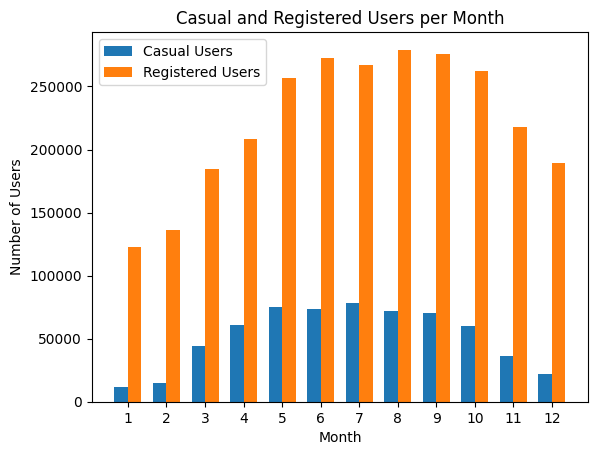

In [71]:
month = user_per_month.index
casual = user_per_month['casual']
registered = user_per_month['registered']

bar_width = 0.35
bar_pos = [i for i in range(len(month))]

plt.bar(bar_pos, casual, width=bar_width, label='Casual Users')
plt.bar([pos + bar_width for pos in bar_pos], registered, width=bar_width, label='Registered Users')

plt.xticks([pos + bar_width / 2 for pos in bar_pos], month)

plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend()
plt.title('Casual and Registered Users per Month')
plt.show()

jumlah total registered user selalu lebih banayak dibandingkan dengan casual user untuk setiap bulannya. dapat disimpulkan jika peminjam sepeda lebih banyak berasal dari registered user (user yang terdaftar). Selain itu, kedua kelompok user cenderung meminjam sepeda pada bulan 5, 6, 7, 8, dan 9. Hal ini menunjukkan adanya sesuatu yang mungkin mempengaruhi, seperti kondisi cuaca pada bulan-bulan tersebut.

Selain itu kita juga bisa membuat visualisasi menggunakan pie chart untuk mengetahui persentase registered dan casual terhadap seluruh jumlah peminjam sepeda.

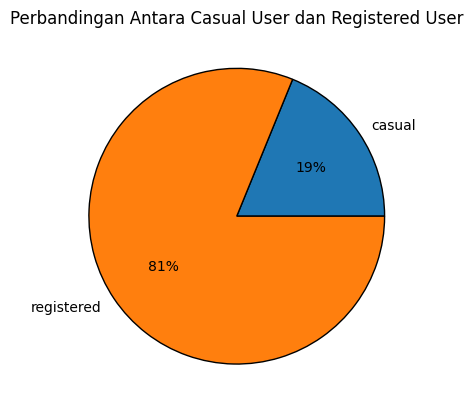

In [72]:
casual_register = [user_per_month['casual'].sum(), user_per_month['registered'].sum()]
labels = ['casual', 'registered']
plt.pie(casual_register, labels = labels, wedgeprops={'edgecolor': 'black'}, autopct='%0.f%%')
plt.title("Perbandingan Antara Casual User dan Registered User")
plt.show()

Dari total jumlah semua user, 81% berasal dari registered user atau pengguna terdaftar, yang mungkin seseorang yang telah mendaftar untuk sebuah akun di sistem peminjaman sepeda dan memberikan informasi pribadi seperti nama, detail kontak, dan terkadang informasi pembayaran. sedangakan dari total jumlah semua user hanya 19% berasal dari casual user yang mungkin seseorang yang menggunakan sistem peminjaman sepeda dalam jangka pendek atau sesekali tanpa memiliki komitmen jangka panjang.

### Apakah ada perbedaan jumlah total user yang signifikan antara hari libur dan bukan hari libur?

Untuk menjawab pertanyaan tersebut, kita perlu membuat sebuah dataframe baru yang memuat rata-rata jumlah peminjam sepeda dari dua jenis user, yaitu casual user dan registered user, pada dua kondisi waktu, yakni hari libur dan hari biasa (non libur). alasan menggunakan parameter statistik rata-rata adalah dikarenakan jumlah hari biasa (non-libur) selalu lebih banyak dengan hari libur.

In [73]:
mean_user_holiday = day.groupby(by = 'holiday').agg({
    'instant' : 'nunique',
    'registered' : 'mean',
    'casual' : 'mean',
    'cnt' : 'mean'
})

In [74]:
mean_user_holiday

,instant,registered,casual,cnt
holiday,,,,
0,710,3685.332394,841.771831,4527.104225
1,21,2670.285714,1064.714286,3735.000000


dari informasi tersebut kita bisa memvisualisasikan total jumlah hari libur dan non-libur

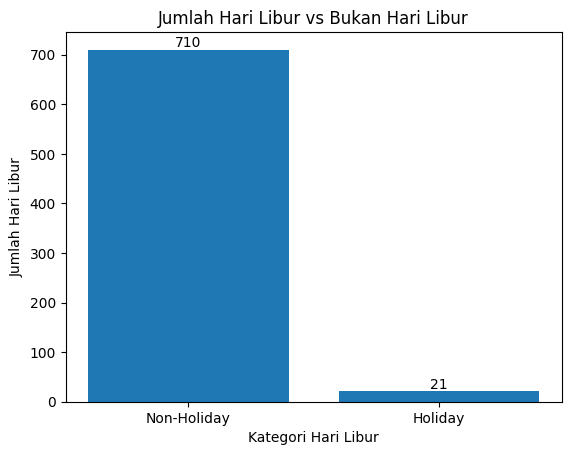

In [75]:
hari_libur = mean_user_holiday.index
jumlah_hari_libur = mean_user_holiday['instant']
plt.xticks(hari_libur, ['Non-Holiday', 'Holiday'])
labels = ['bukan hari libur', 'hari libur']
plt.bar(hari_libur, jumlah_hari_libur)

for i, v in enumerate(jumlah_hari_libur):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.xlabel('Kategori Hari Libur')
plt.ylabel('Jumlah Hari Libur')
plt.title('Jumlah Hari Libur vs Bukan Hari Libur')

plt.show()

Selanjutnya kita juga bisa memvisualisasikan perbandingan jumlah semua user pada hari libur dan non-libur dengan menggunakan stacked bar chart agar visualisasi data yang dibuat juga memuat informasi tentang jumlah masing-masing jenis user (registered dan casual user).

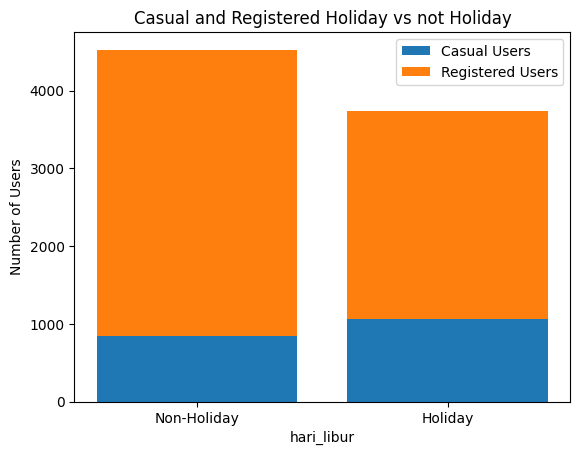

In [76]:
casual = mean_user_holiday['casual']
registered = mean_user_holiday['registered']
hari_libur = mean_user_holiday.index


plt.xticks(hari_libur, ['Non-Holiday', 'Holiday'])
plt.bar(hari_libur, casual, label='Casual Users')
plt.bar(hari_libur, registered, bottom=casual, label='Registered Users')
plt.xlabel('hari_libur')
plt.ylabel('Number of Users')
plt.legend()
plt.title('Casual and Registered Holiday vs not Holiday')
plt.show()

total seluruh user cenderung meminjam sepeda pada hari biasa (non-libur) namun terdapat informasi menarik yaitu casual user lebih banyak meminjam sepeda pada hari libur.

### Apakah user lebih banyak meminjam sepeda di jam tertentu?

Untuk menjawab pertanyaan tersebut kita perllu membuat dataframe baru yang memuat informasi rata-rata jumlah user peminjam sepeda setiap kategori waktu yang telah dibuat sebelumnya pada tahap Exploratory Data analysis (EDA).

In [77]:
users_per_time = hour.groupby(by = "time_category").agg({
    'casual' : 'mean',
    'registered' : 'mean'
})

In [78]:
users_per_time

,casual,registered
time_category,,
afternoon,74.160132,229.741157
evening,48.708333,272.313187
morning,28.978899,179.121789
night,10.388545,50.216254
noon,68.293956,185.021978


Agar orang lain dapat memahami informasi tersebut dengan mudah dibuatkan visualisasi dengan menggunakan stacked barchart.

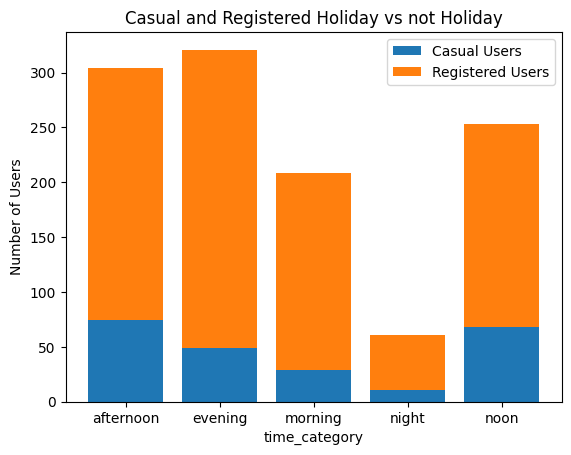

In [79]:
casual = users_per_time['casual']
registered = users_per_time['registered']
time_category = users_per_time.index


plt.bar(time_category, casual, label='Casual Users')
plt.bar(time_category, registered, bottom=casual, label='Registered Users')
plt.xlabel('time_category')
plt.ylabel('Number of Users')
plt.legend()
plt.title('Casual and Registered Holiday vs not Holiday')
plt.show()

Dari hasil visualisasi tersebut dapat disimpulkan bahwa casual user lebih cenderung meminjam sepeda pada sore hari sedangkan registered user cenderung meminjam sepeda pada sore hari Sebaliknya, kategori malam hari memiliki jumlah casual user dan registered user yang paling rendah.

### Geoanalysis

Geoanalisis, yang juga dikenal sebagai analisis spasial atau analisis geografis, adalah proses memeriksa, memodelkan, dan menginterpretasikan data yang memiliki komponen geografis atau spasial. Analisis ini melibatkan studi data dalam kaitannya dengan lokasi geografisnya di permukaan bumi.

Berikut adalah penerapan geoanalisis dalam analisis bike-sharing dataset.
- Pengaruh Variasi musim: Menginvestigasi bagaimana tingkat peminjaman sepeda berubah selama musim yang berbeda.

- Dampak Cuaca: Menilai pengaruh kondisi cuaca terhadap penggunaan sepeda dengan menghubungkan parameter cuaca seperti suhu, kelembaban, dan kecepatan angin dengan tingkat peminjaman sepeda.

### Apakah user cenderung meminjam sepeda pada musim-musim tertentu?

In [80]:
users_per_season = day.groupby(by ="season").agg({
    'casual' : 'sum',
    'registered' : 'sum'
})

In [81]:
users_per_season

,casual,registered
season,,
fall,226091,835038
springer,60622,410726
summer,203522,715067
winter,129782,711831


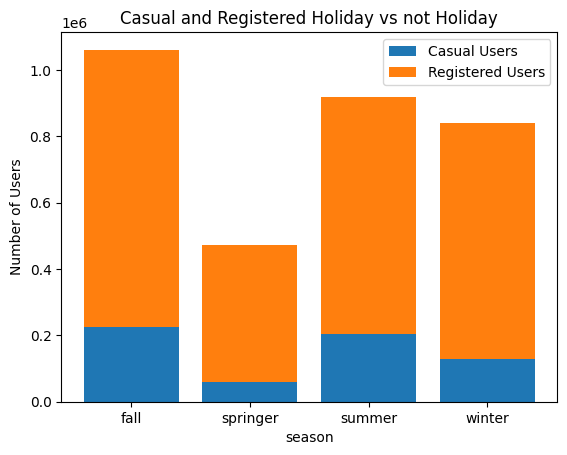

In [82]:
casual = users_per_season['casual']
registered = users_per_season['registered']
season = users_per_season.index


plt.bar(season, casual, label='Casual Users')
plt.bar(season, registered, bottom=casual, label='Registered Users')
plt.xlabel('season')
plt.ylabel('Number of Users')
plt.legend()
plt.title('Casual and Registered Holiday vs not Holiday')
plt.show()

Dari hasil visualisasi tersebut didapatkan informasi bahwa semua jenis user lebih cenderung meminjam sepeda pada fall season atau musim gugur. alasan user cenderung meminjam sepeda di musim gugur mungkin dikarenakan suhu udara yang hangat menciptakan lingkungan yang ideal untuk bersepeda yang menyenangkan.

### Bagaimana pengaruh parameter cuaca terhadap peminjaman sepeda?

Sebelum menjawab pertanyaan tersebut, terlebih dahulu kita lihat bagaimana hubungan antar parameter cuaca yaitu temperatur, kelembaban dengan temperatur yang dirasakan. untuk itu saya menggunakan scatter plot untuk memvisualisasikan hubungan antar variabel tersebut.

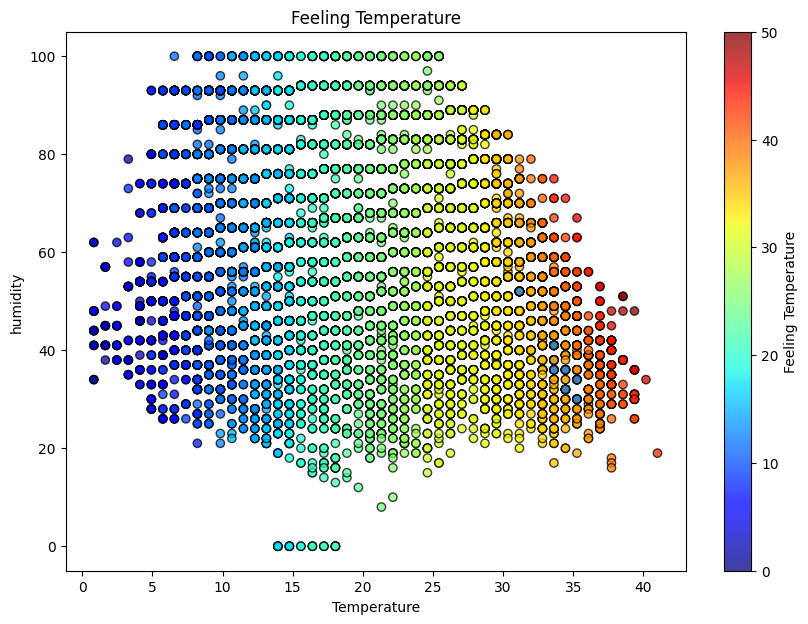

In [83]:
temperature = hour['temp']
humidity = hour['hum']
windspeed = hour['windspeed']
atemp = hour['atemp']

fig = plt.figure(figsize=(10, 7))
ax = plt.axes()


scatter_plot = ax.scatter(temperature, humidity, c=atemp, cmap = "jet" ,edgecolors='black', linewidths=1, alpha=0.75)

cbar = plt.colorbar(scatter_plot)

plt.xlabel("Temperature")
plt.ylabel("humidity")
cbar.set_label('Feeling Temperature')
plt.title("Feeling Temperature")

plt.show()

Dari hasil visualisasi tersebut bisa disimpulkan bahwa jika temperatur dan kelembaban tinggi maka suhu yang dirasakan semakin panas, jika temperatur rendah dan kelembaban tinggi temperatur yang dirasakan akan semakin dingin namun jika suhu udara tinggi namun kelembaban rendah temperatur yang dirasakan akan tidak terlalu panas.


Namun temperatur yang dirasakan tidak hanya dipengaruhu oleh temperatur dan kelembaban melainkan juga dipengaruhi oleh kecepatan angin. untuk melihat hubungan antara temperatur, kelembaban, dan kecepatan angin terhadap temperatur yang dirasakan kita bisa memvisualisasikannya dengan grafik 3 dimensi namun dikarenakan grafik 3 dimensi sulit dapahami jika data yang diberikan terlalu banyak maka kita akan visualisasikan hubungan antara 3 variabel tersebut dengan temperature yang dirasakan hanya pada musim gugur (fall season).

In [84]:
hour.loc[hour['season'] ==3, ['temp', 'atemp']].head(360)

,temp,atemp
4010,25.42,29.545
4011,25.42,29.545
4012,25.42,28.790
4013,25.42,28.790
4014,24.60,27.275
...,...,...
4365,32.80,38.635
4366,31.16,36.365
4367,31.98,37.120
4368,31.16,36.365


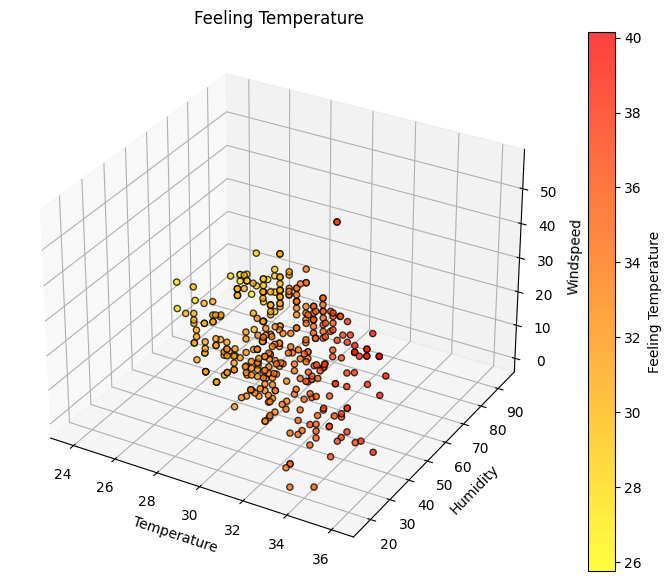

In [85]:
temperature = hour['temp'].iloc[4010:4369]
humidity = hour['hum'].iloc[4010:4369]
windspeed = hour['windspeed'].iloc[4010:4369]
atemp = hour['atemp'].iloc[4010:4369]

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")


scatter_plot = ax.scatter3D(temperature, humidity, windspeed, c=atemp, cmap = "autumn_r" ,edgecolors='black', linewidths=1, alpha=0.75)

cbar = plt.colorbar(scatter_plot)

plt.xlabel("Temperature")
plt.ylabel("Humidity")
ax.set_zlabel("Windspeed")
cbar.set_label('Feeling Temperature')
plt.title("Feeling Temperature")

plt.show()

Dari hasil visualisasi tersebut dapat disimpulkan beberapa bahwa parameter cuaca seperti temperatur, kelembaban dan kecepatan angin sangat berperngaruh terhadap temperatur yang dirasakan. diantaranya jika temperatur tinggi, kelembaban tinggi dan kecepatan angin rendah maka temperatur yang dirasakan akan sangat panas.


Parameter cuaca seperti temperatur, kelembaban dan kecepatan angin sangat berperngaruh terhadap temperatur yang dirasakan. selanjutnya kita akan mencari tahu hubungan antara kategori temperatur yang dirasakan dengan jumlah useryang meminjam sepeda.

In [86]:
users_feeling_temperature = hour.groupby(by='atemp_category').agg({
    'casual' : 'median',
    'registered' : 'median'
})

In [87]:
users_feeling_temperature

,casual,registered
atemp_category,,
cold,3.0,48.0
cool,12.0,100.0
hot,53.0,191.0
very hot,61.0,195.0
warm,19.0,111.0


Untuk memudahkan orang lain untuk memahami informasi tersebut dibuatkan visualisasi dengan menggunakan stacked bar chart.

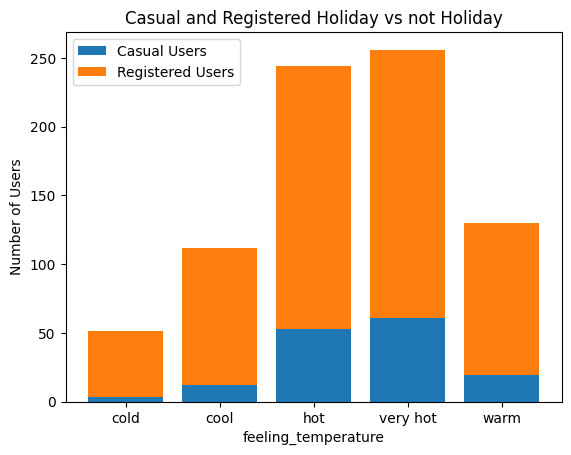

In [88]:
casual = users_feeling_temperature['casual']
registered = users_feeling_temperature['registered']
feeling_temperature = users_feeling_temperature.index

plt.bar(feeling_temperature, casual, label='Casual Users')
plt.bar(feeling_temperature, registered, bottom=casual, label='Registered Users')
plt.xlabel('feeling_temperature')
plt.ylabel('Number of Users')
plt.legend()
plt.title('Casual and Registered Holiday vs not Holiday')
plt.show()

Dari visualisasi tersebut dapat disimpulkan bahwa kedua jenis user (registered user dan casual user) lebih cenderung meminjam sepeda pada saat temperature yang dirasakan lebih panas.

Terakhir kita bisa memvisualisasikan bagaimana hubungan antara kondisi cuaca terhadap jumlah peminjam sepeda

In [89]:
weathersit_user = hour.groupby(by = 'weathersit').agg({
    'casual' : 'mean',
    'registered':'mean'
})

In [90]:
weathersit_user

,casual,registered
weathersit,,
1,40.545431,164.323841
2,29.595290,145.570202
3,16.055673,95.523608
4,2.666667,71.666667


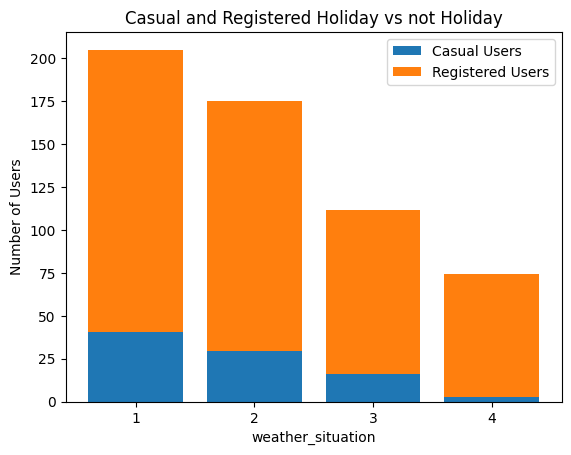

In [91]:
casual = weathersit_user['casual']
registered = weathersit_user['registered']
weather_situation = weathersit_user.index

plt.bar(weather_situation, casual, label='Casual Users')
plt.bar(weather_situation, registered, bottom=casual, label='Registered Users')
plt.xlabel('weather_situation')
plt.ylabel('Number of Users')
plt.xticks(weather_situation, [1,2,3,4])
plt.legend()
plt.title('Casual and Registered Holiday vs not Holiday')
plt.show()

Berdasarkan hasil visualisasi tersebut didapatkan informasi bahwa kedua jenis user yaitu casual user dan registered user cenderung meminjam sepeda pada keadaan cuaca 1, jika dilihat dari dokumentasi keadaan cuaca 1 ini adalah Cerah, Sedikit awan, Sebagian berawan. sebaliknya sangat sedikit user meminjam sepeda pada kondis cuaca 4 yaitu Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

## Conclusion

- Bagaimana perbandingan jumlah antara casual user dan registered user perbulan dalam 2 tahun (2011 dan 2012)? <br>
jumlah total registered user selalu lebih banayak dibandingkan dengan casual user untuk setiap bulannya. dapat disimpulkan jika peminjam sepeda lebih banyak berasal dari registered user (user yang terdaftar). Selain itu, kedua kelompok user cenderung meminjam sepeda pada bulan 5, 6, 7, 8, dan 9. Hal ini menunjukkan adanya sesuatu yang mungkin mempengaruhi, seperti kondisi cuaca pada bulan-bulan tersebut.
Dari total jumlah semua user, 81% berasal dari registered user atau pengguna terdaftar, yang mungkin seseorang yang telah mendaftar untuk sebuah akun di sistem peminjaman sepeda dan memberikan informasi pribadi seperti nama, detail kontak, dan terkadang informasi pembayaran. sedangakan dari total jumlah semua user hanya 19% berasal dari casual user yang mungkin seseorang yang menggunakan sistem peminjaman sepeda dalam jangka pendek atau sesekali tanpa memiliki komitmen jangka panjang.
- Apakah ada perbedaan jumlah total user yang signifikan antara hari libur dan bukan hari libur?<br>
Total seluruh user cenderung meminjam sepeda pada hari biasa (non-libur) namun terdapat informasi menarik yaitu casual user lebih banyak meminjam sepeda pada hari libur.
- Apakah user lebih banyak meminjam sepeda di jam tertentu?<br>
casual user lebih cenderung meminjam sepeda pada sore hari sedangkan registered user cenderung meminjam sepeda pada sore hari Sebaliknya, kategori malam hari memiliki jumlah casual user dan registered user yang paling rendah.
- Apakah user cenderung meminjam sepeda pada musim-musim tertentu? <br>
Semua jenis user lebih cenderung meminjam sepeda pada fall season atau musim gugur. alasan user cenderung meminjam sepeda di musim gugur mungkin dikarenakan suhu udara yang hangat menciptakan lingkungan yang ideal untuk bersepeda yang menyenangkan.
- Bagaimana pengaruh parameter cuaca terhadap peminjaman sepeda?<br>
Cuaca seperti temperatur, kelembaban, dan kecepatan angin sangat mempengaruhi bagaimana suhu dirasakan. Misalnya, jika temperatur tinggi, kelembaban tinggi, dan kecepatan angin rendah, maka suhu yang dirasakan akan sangat panas.
Ketika suhu terasa sangat panas, baik pengguna sepeda yang terdaftar (registered user) maupun pengguna sepeda biasa (casual user) cenderung lebih sering meminjam sepeda. Mereka lebih suka meminjam sepeda saat cuaca cerah dengan sedikit awan atau sebagian berawan, seperti cuaca 1 yang tercatat dalam dokumentasi.vSebaliknya, sangat sedikit sekali pengguna yang meminjam sepeda ketika cuaca sangat buruk, seperti cuaca 4 yang mencakup hujan lebat, palet es, badai petir, kabut, salju, dan kabut.

In [92]:
hour.to_csv('hour.csv')

In [93]:
day.to_csv('day.csv')